In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [10]:
soleado = pd.read_csv('Dataframe soleado por hora')
nublado = pd.read_csv('Dataframe nublado por hora')
p_nublado = pd.read_csv('Dataframe parcialmente nublado por hora')
print('Tamaño soleado:',len(soleado))
print('Tamaño nublado:',len(nublado))
print('Tamaño parcialmente nublado:',len(p_nublado))

Tamaño soleado: 790
Tamaño nublado: 1070
Tamaño parcialmente nublado: 2720


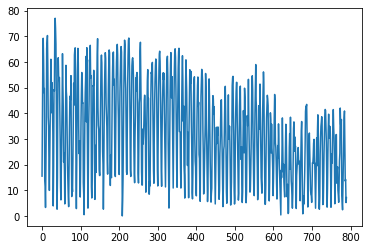

In [3]:
soleado['Energia [kWh]'].plot()

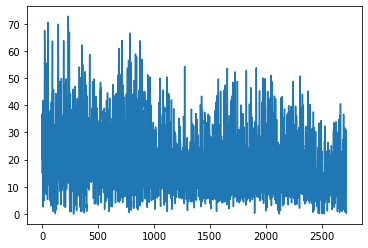

In [4]:
p_nublado['Energia [kWh]'].plot()

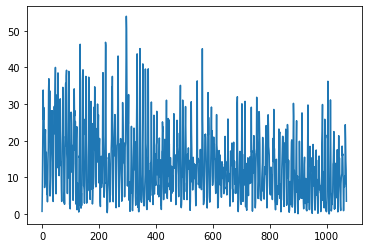

In [5]:
nublado['Energia [kWh]'].plot()

In [6]:
print('Energia media soleado:',soleado['Energia [kWh]'].values.mean())
print('Energia media p_nublad:',p_nublado['Energia [kWh]'].values.mean())
print('Energia media nublado:',nublado['Energia [kWh]'].values.mean())

Energia media soleado: 32.14150105493038
Energia media p_nublad: 20.294000919094486
Energia media nublado: 13.232911214959813


In [9]:
print('Desv Energia soleado:',soleado['Energia [kWh]'].values.std())
print('Desv Energia p_nublad:',p_nublado['Energia [kWh]'].values.std())
print('Desv Energia nublado:',nublado['Energia [kWh]'].values.std())

Desv Energia soleado: 18.17161006439877
Desv Energia p_nublad: 12.65669034501124
Desv Energia nublado: 9.25478455811146


### Funcion mape

In [112]:
#Mape = (1/N)* sumatoria(|(real-predicho)|/real)*100

def mape_funcion (real,pronostico,shift):
    real = real[shift:]
    pronostico = pronostico[shift:]
    N = len(real)
    #print(real[0])
    error = []
    for i in range(N):
        if real[i]== 0 :
            N=N-1
        else:
            error.append(np.abs(real[i]-pronostico[i])/real[i])

    return sum(error)/N*100,'%'

## Persistencia soleados

In [174]:
sol_real = soleado['Energia [kWh]']
sol_pron = sol_real.shift()

In [186]:
rmse_sol = math.sqrt(mean_squared_error(sol_real[1:],sol_pron[1:]))
mae_sol = mean_absolute_error(sol_real[1:],sol_pron[1:])
corre = np.corrcoef(sol_real[1:],sol_pron[1:])

In [180]:
mape_sol = mape_funcion(sol_real.values,sol_pron.values,1)

In [187]:
print('El RMSE soleado es:',rmse_sol)
print('El MAE soleado es:',mae_sol)
print('El MAPE soleado es:',mape_sol)
print('La CORRE soleado es:',corre)

El RMSE soleado es: 12.244055422419919
El MAE soleado es: 10.037153569846641
El MAPE soleado es: (58.35535588791482, '%')
La CORRE soleado es: [[1.         0.77288999]
 [0.77288999 1.        ]]


## Persistencia parcialmente nublado

In [133]:
shift = 1
parcial_real = p_nublado['Energia [kWh]']
parcial_pron = parcial_real.shift(shift) 

In [182]:
rmse_parcial = math.sqrt(mean_squared_error(parcial_real[shift:],parcial_pron[shift:]))
mae_parcial   = mean_absolute_error(parcial_real[shift:],parcial_pron[shift:])
mape_parcial = mape_funcion(parcial_real.values,parcial_pron.values,shift)
corre = np.corrcoef(parcial_real[shift:],parcial_pron[shift:])

In [184]:
print('El RMSE soleado es:',rmse_parcial)
print('El MAE soleado es:',mae_parcial)
print('El MAPE soleado es:',mape_parcial)
corre

El RMSE soleado es: 10.444494618930548
El MAE soleado es: 8.127252973010297
El MAPE soleado es: (71.50093232082972, '%')


array([[1.        , 0.65946758],
       [0.65946758, 1.        ]])

## Persistencia nublado

In [188]:
shift = 1
nublado_real = nublado['Energia [kWh]']
nublado_pron = nublado_real.shift(shift) 

In [189]:
rmse_nublado = math.sqrt(mean_squared_error(nublado_real[shift:],nublado_pron[shift:]))
mae_nublado   = mean_absolute_error(nublado_real[shift:],nublado_pron[shift:])
mape_nublado = mape_funcion(nublado_real.values,nublado_pron.values,shift)
corre_train = np.corrcoef(nublado_real[shift:],nublado_pron[shift:])

In [190]:
print('El RMSE soleado es:',rmse_nublado)
print('El MAE soleado es:',mae_nublado)
print('El MAPE soleado es:',mape_nublado)
corre_train

El RMSE soleado es: 8.193936052123501
El MAE soleado es: 6.123780792039289
El MAPE soleado es: (92.68658398282946, '%')


array([[1.        , 0.60788579],
       [0.60788579, 1.        ]])

## Persistencia total

In [159]:
datos = pd.read_csv('Datos horarios con irradiacion extraterrestre.csv')
datos = datos[datos.Hora != '6:00']
datos = datos[datos.Hora != '17:00']
datos = datos.set_index(np.array(range(len(datos))))
datos

,Fecha,Hora,Energia [kWh],Irradiacion [Wh/m2],Irradiacion extraterrestre [Wh/m2]
0,1/10/2019,7:00,15.220000,242.950833,343.706170
1,1/10/2019,8:00,34.786667,522.285000,671.302174
2,1/10/2019,9:00,36.830000,503.754167,952.615240
3,1/10/2019,10:00,30.043333,377.405833,1168.474348
4,1/10/2019,11:00,19.769167,242.401667,1304.169056
...,...,...,...,...,...
4575,31/12/2020,12:00,5.960000,138.326667,1250.258526
4576,31/12/2020,13:00,3.046667,75.204167,1206.151683
4577,31/12/2020,14:00,0.524167,19.589167,1076.836960
4578,31/12/2020,15:00,0.206667,11.668333,871.126943


In [170]:
total_real = datos['Energia [kWh]']
total_pron = total_real.shift()

In [172]:
rmse_total = math.sqrt(mean_squared_error(total_real[shift:],total_pron[shift:]))
mae_total   = mean_absolute_error(total_real[shift:],total_pron[shift:])
mape_total = mape_funcion(total_real.values,total_pron.values,shift)

In [173]:
print('El RMSE total es:',rmse_total)
print('El MAE total es:',mae_total)
print('El MAPE total es:',mape_total)

El RMSE total es: 10.320279717594373
El MAE total es: 7.992527662570648
El MAPE total es: (74.44669202203035, '%')
